# Objective
The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimatel 
lead to increased profitability for the airline.

In [3]:
# importing libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# database connection

connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [7]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print('List of tables present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [12]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
print(aircrafts_data.shape)
aircrafts_data

(9, 3)


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [14]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
print(airports_data.shape)
airports_data.head()

(104, 5)


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [15]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
print(boarding_passes.shape)
boarding_passes.head()

(579686, 4)


,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [16]:
bookings = pd.read_sql_query("select * from bookings", connection)
print(bookings.shape)
bookings.head()

(262788, 3)


,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [17]:
flights = pd.read_sql_query("select * from flights", connection)
print(flights.shape)
flights.head()

(33121, 10)


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [19]:
seats = pd.read_sql_query("select * from seats", connection)
print(seats.shape)
seats

(1339, 3)


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [20]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
print(ticket_flights.shape)
ticket_flights

(1045726, 4)


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [21]:
tickets = pd.read_sql_query("select * from tickets", connection)
print(tickets.shape)
tickets

(366733, 3)


,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [22]:
# to get the info of tables and thier column datatype

for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3]) # slicing it for column_name and datatype only


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [23]:
for table in table_list:
    print('\ntable:', table)
    dB_table = pd.read_sql_query("select * from {}".format(table),connection)
    print(dB_table.isnull().sum())   


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


                                                    Fortunatly we have no null values

In [28]:
# How many aircrafts have more than 100 seats?

pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats group by aircraft_code having count(*)>100""", connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


In [31]:
profit = pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref = bookings.book_ref""", connection)

profit.dtypes

In [35]:
profit['book_date'] = pd.to_datetime(profit['book_date'])
profit.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [38]:
profit['date'] = profit['book_date'].dt.date
profit

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


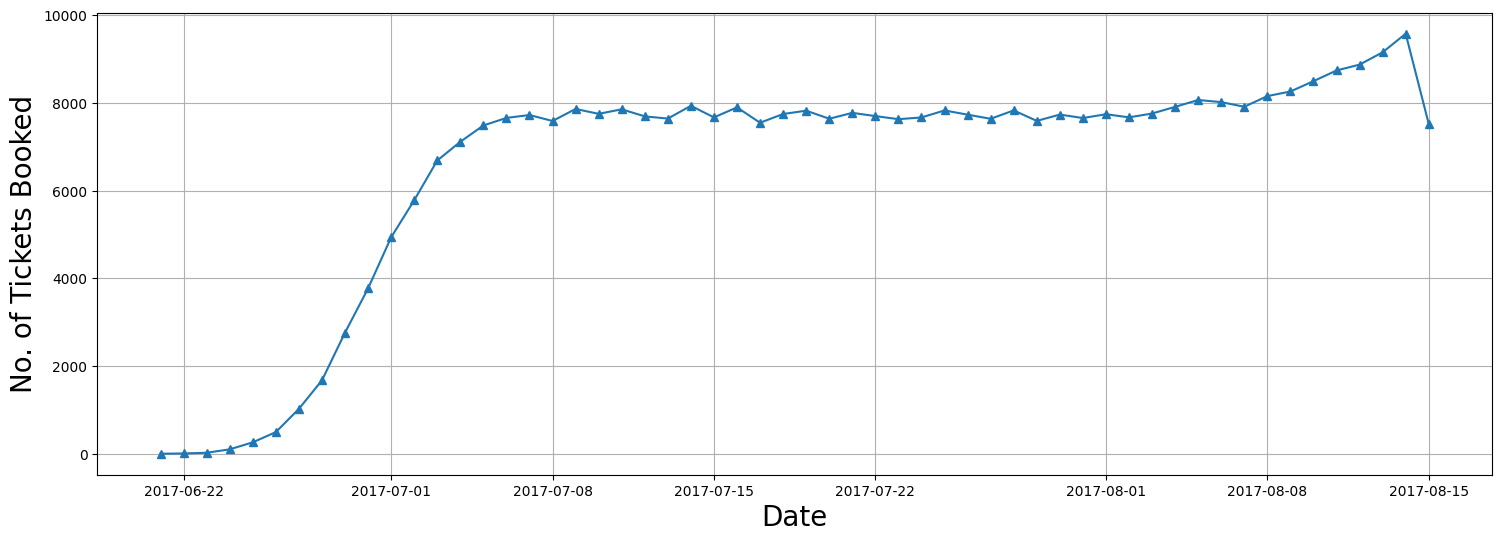

In [50]:
plot = profit.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(plot.index, plot['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('No. of Tickets Booked', fontsize = 20)
plt.grid('b')
plt.show()

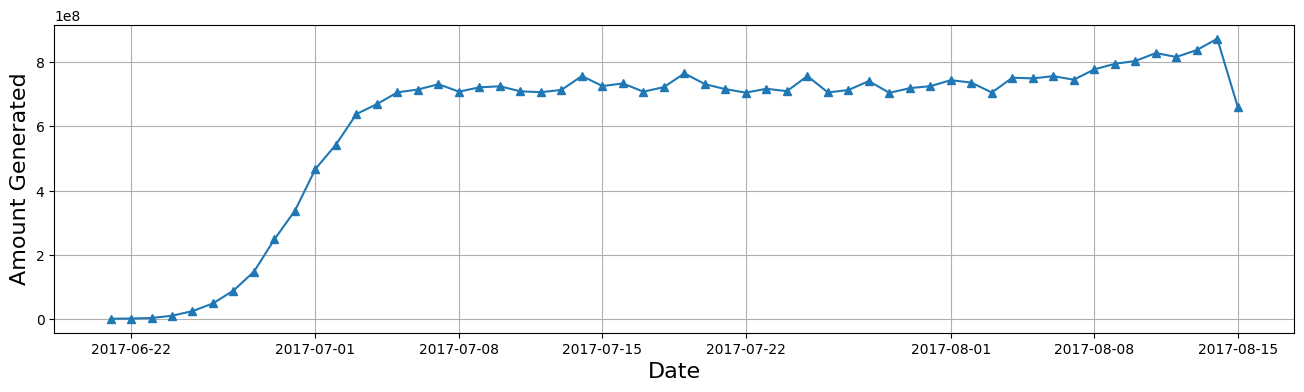

In [55]:
plot = profit.groupby('date')[['total_amount']].sum()

plt.figure(figsize = (16,4))
plt.plot(plot.index, plot['total_amount'], marker = '^')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Amount Generated', fontsize = 16)
plt.grid('b')
plt.show()

In [59]:
Flight_output = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) as avg_amount from ticket_flights join flights on 
 ticket_flights.flight_id = flights.flight_id group by aircraft_code, fare_conditions""", connection)
Flight_output

,fare_conditions,aircraft_code,avg_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

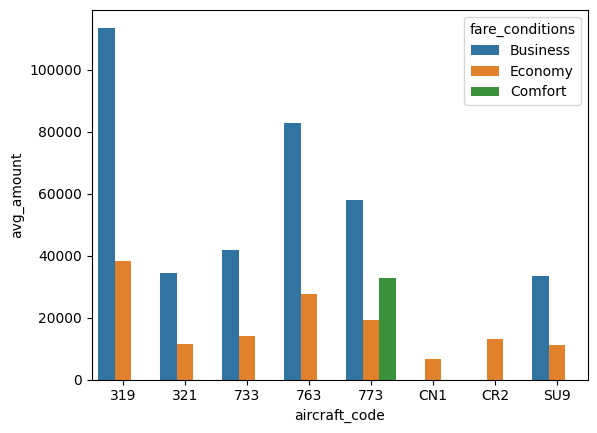

In [60]:
import seaborn as sea

sea.barplot(data = Flight_output, x = 'aircraft_code', y = 'avg_amount', hue = 'fare_conditions')

## Understanding Occupancies

In [62]:
# For each aircraft, calculating revenue per ticket

rev_per_ticket = pd.read_sql_query("""select aircraft_code, count(*) as ticket_count, sum(amount) as revenue from ticket_flights join
                                        flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""", connection)

In [65]:
rev_per_ticket['rev_/_tic'] = round(rev_per_ticket['revenue']/rev_per_ticket['ticket_count'],2)

In [66]:
rev_per_ticket

,aircraft_code,ticket_count,revenue,rev_/_tic
0,319,52853,2706163100,51201.69
1,321,107129,1638164100,15291.51
2,733,86102,1426552100,16568.16
3,763,124774,4371277100,35033.56
4,773,144376,3431205500,23765.76
5,CN1,14672,96373800,6568.55
6,CR2,150122,1982760500,13207.66
7,SU9,365698,5114484700,13985.54


In [78]:
# For each aircraft, calculating average occupancy of seats

occup_of_flights = pd.read_sql_query(""" SELECT occupied.aircraft_code, avg(occupied.seats_count) as avg_booked_seats, total.num_seats,
                                            avg(occupied.seats_count)/total.num_seats as occupancy_rate
                                            FROM (
                                                select aircraft_code, flights.flight_id, count(ticket_no) as seats_count 
                                                        from ticket_flights 
                                                        join flights 
                                                        on ticket_flights.flight_id = flights.flight_id 
                                                        group by aircraft_code,flights.flight_id
                                                        ) as occupied
                                            JOIN (
                                                select aircraft_code, count(*) as num_seats from seats group by aircraft_code
                                                        ) as total
                                            ON occupied.aircraft_code = total.aircraft_code
                                            GROUP BY occupied.aircraft_code""", connection)
occup_of_flights

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate
0,319,49.534208,116,0.427019
1,321,82.789026,170,0.486994
2,733,73.970790,130,0.569006
3,763,104.413389,222,0.470331
4,773,237.070608,402,0.589728
5,CN1,5.771833,12,0.480986
6,CR2,20.221175,50,0.404423
7,SU9,52.762661,97,0.543945


In [82]:
occup_of_flights['Inc occupancy rate'] = occup_of_flights ['occupancy_rate']*1.1
occup_of_flights

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,49.534208,116,0.427019,0.469721
1,321,82.789026,170,0.486994,0.535694
2,733,73.970790,130,0.569006,0.625907
3,763,104.413389,222,0.470331,0.517364
4,773,237.070608,402,0.589728,0.648701
5,CN1,5.771833,12,0.480986,0.529085
6,CR2,20.221175,50,0.404423,0.444866
7,SU9,52.762661,97,0.543945,0.598339


In [85]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue 
                                            from ticket_flights 
                                            join flights 
                                            on ticket_flights.flight_id = flights.flight_id 
                                            group by aircraft_code""", connection)

occup_of_flights['Inc Turnover'] = (total_revenue['total_revenue']/occup_of_flights['occupancy_rate'])*occup_of_flights['Inc occupancy rate']

occup_of_flights

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Turnover
0,319,49.534208,116,0.427019,0.469721,2.976779e+09
1,321,82.789026,170,0.486994,0.535694,1.801981e+09
2,733,73.970790,130,0.569006,0.625907,1.569207e+09
3,763,104.413389,222,0.470331,0.517364,4.808405e+09
4,773,237.070608,402,0.589728,0.648701,3.774326e+09
5,CN1,5.771833,12,0.480986,0.529085,1.060112e+08
6,CR2,20.221175,50,0.404423,0.444866,2.181037e+09
7,SU9,52.762661,97,0.543945,0.598339,5.625933e+09


In [92]:
pd.set_option('display.float_format', str)

In [93]:
occup_of_flights

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Turnover
0,319,49.53420805998125,116,0.4270190349998384,0.46972093849982227,2976779410.0000005
1,321,82.78902627511592,170,0.4869942722065642,0.5356936994272207,1801980510.0
2,733,73.97079037800687,130,0.5690060798308221,0.6259066878139043,1569207310.0000002
3,763,104.41338912133891,222,0.47033058162765273,0.517363639790418,4808404810.0
4,773,237.0706075533662,402,0.5897278794859856,0.6487006674345842,3774326050.0
5,CN1,5.7718332022029895,12,0.48098610018358245,0.5290847102019407,106011180.0
6,CR2,20.221174568965516,50,0.40442349137931033,0.4448658405172414,2181036550.0
7,SU9,52.76266051074881,97,0.5439449537190599,0.5983394490909659,5625933170.0
